# Importing Libraries

In [463]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import sklearn
import joblib

In [464]:
#Loading Data
data=pd.read_csv("Shopping Mall Customer Segmentation Data .csv")
data.head()

,Customer ID,Age,Gender,Annual Income,Spending Score
0,d410ea53-6661-42a9-ad3a-f554b05fd2a7,30,Male,151479,89
1,1770b26f-493f-46b6-837f-4237fb5a314e,58,Female,185088,95
2,e81aa8eb-1767-4b77-87ce-1620dc732c5e,62,Female,70912,76
3,9795712a-ad19-47bf-8886-4f997d6046e3,23,Male,55460,57
4,64139426-2226-4cd6-bf09-91bce4b4db5e,24,Male,153752,76


## EDA

In [466]:
data.shape

(15079, 5)

In [467]:
data.drop("Customer ID",axis=1,inplace=True)

In [468]:
data.rename(columns={"Annual Income":"AnnualIncome"},inplace=True)
data.rename(columns={"Spending Score":"Spending_Score"},inplace=True)

In [469]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15079 entries, 0 to 15078
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             15079 non-null  int64 
 1   Gender          15079 non-null  object
 2   AnnualIncome    15079 non-null  int64 
 3   Spending_Score  15079 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 471.3+ KB


In [470]:
data.isnull().sum()

Age               0
Gender            0
AnnualIncome      0
Spending_Score    0
dtype: int64

In [471]:
data.duplicated().sum()

0

In [472]:
data.describe()

,Age,AnnualIncome,Spending_Score
count,15079.000000,15079.000000,15079.000000
mean,54.191591,109742.880562,50.591617
std,21.119207,52249.425866,28.726977
min,18.000000,20022.000000,1.000000
25%,36.000000,64141.000000,26.000000
50%,54.000000,109190.000000,51.000000
75%,72.000000,155008.000000,75.000000
max,90.000000,199974.000000,100.000000


In [473]:
data.Age.unique()

array([30, 58, 62, 23, 24, 42, 27, 83, 37, 63, 25, 32, 51, 64, 19, 89, 65,
       26, 21, 70, 39, 61, 79, 73, 90, 35, 57, 76, 40, 82, 84, 56, 55, 45,
       28, 67, 69, 46, 36, 48, 50, 49, 80, 33, 38, 54, 81, 44, 75, 60, 52,
       72, 68, 31, 22, 71, 53, 18, 88, 74, 78, 59, 29, 34, 87, 20, 77, 41,
       85, 86, 47, 43, 66], dtype=int64)

In [474]:
data.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [475]:
data.AnnualIncome.unique()

array([151479, 185088,  70912, ..., 112337,  94312,  78045], dtype=int64)

In [476]:
data.Spending_Score.unique()

array([ 89,  95,  76,  57,  40,  37,  17,  34,   3,  75,  80,  96,  87,
        81,  82,  97,  12,  49,  36,   6,  45,   7,  15,  55,  23,  25,
        52,  62,  66,   5,  43,  86,  39,  77,  29,   1,  16,  68,   2,
        35,  54,  32,  90,  91,  53,  61,  31,  93,  79,  14,  27,   9,
        59,  72,  24,  20,  48,   4,  98,  67,  42,  65,  22,  63,  33,
        10,  74,  13,  84,  18,  44,  71,  83,  64,  51,  56,  50,  46,
        78,  47,  70,  73,   8, 100,  99,  92,  26,  11,  19,  28,  94,
        88,  21,  69,  85,  38,  30,  41,  60,  58], dtype=int64)

## Data Visualization

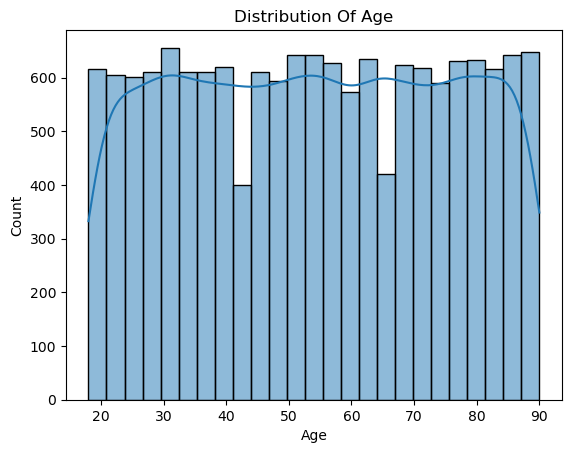

In [478]:
sns.histplot(data=data,x="Age",bins=25,kde=True)
plt.title("Distribution Of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

In [479]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data["Gender"]=encoder.fit_transform(data["Gender"])

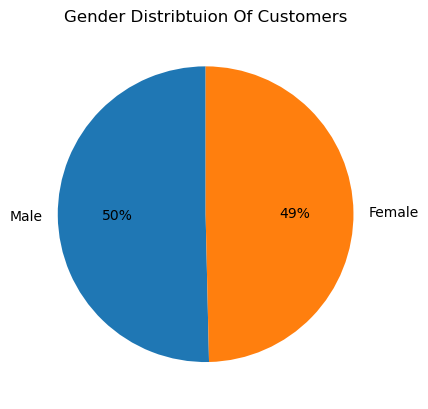

In [480]:
counts=data.Gender.value_counts()
plt.pie(x=counts,autopct="%i%%",startangle=90,labels=["Male","Female"])
plt.title("Gender Distribtuion Of Customers")
plt.show()

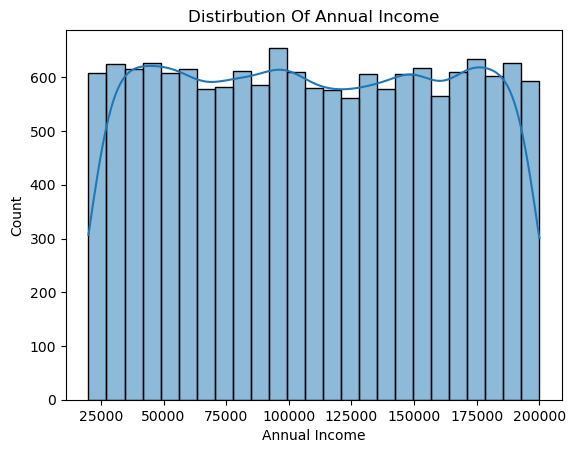

In [481]:
sns.histplot(data=data,x="AnnualIncome",bins=25,kde=True)
plt.title("Distirbution Of Annual Income")
plt.xlabel("Annual Income")
plt.ylabel("Count")
plt.show()

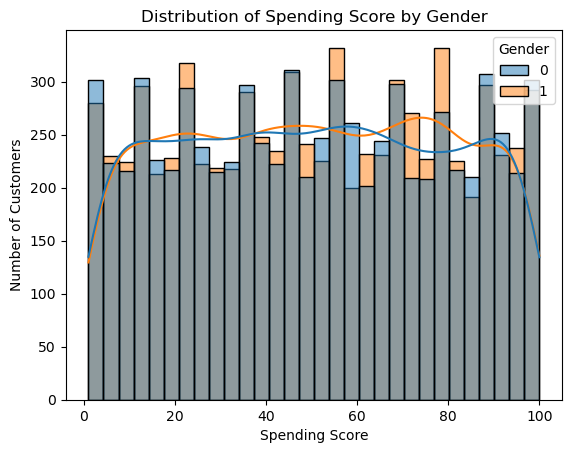

In [482]:
sns.histplot(data=data,x="Spending_Score",bins=30,kde=True,hue="Gender")
plt.title("Distribution of Spending Score by Gender")
plt.xlabel("Spending Score")
plt.ylabel("Number of Customers")
plt.show()

In [483]:
bins = [0,20000,40000,60000,80000,100000,120000,140000,160000,180000,200000]
labels = [
    "0–20k", "20k–40k", "40k–60k", "60k–80k", 
    "80k–100k", "100k–120k", "120k–140k", 
    "140k–160k", "160k–180k", "180k–200k"
]

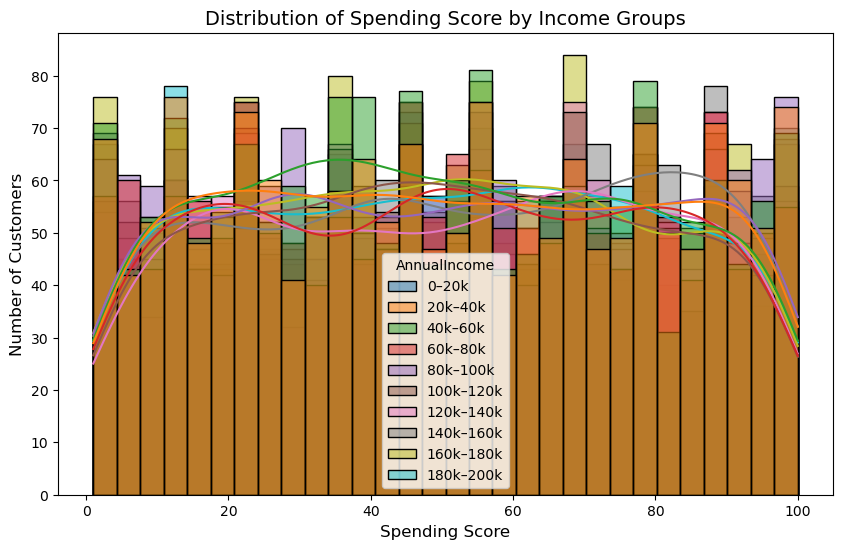

In [484]:
bins = [0,20000,40000,60000,80000,100000,120000,140000,160000,180000,200000]
labels = [
    "0–20k", "20k–40k", "40k–60k", "60k–80k", 
    "80k–100k", "100k–120k", "120k–140k", 
    "140k–160k", "160k–180k", "180k–200k"
]

plt.figure(figsize=(10,6))
sns.histplot(
    data=data, 
    x="Spending_Score", 
    bins=30, 
    kde=True,
    hue=pd.cut(data["AnnualIncome"], bins=bins, labels=labels),
    palette="tab10"
)

plt.title("Distribution of Spending Score by Income Groups", fontsize=14)
plt.xlabel("Spending Score", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.show()


# Using KMEANS Clustering

In [486]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans

In [487]:
numerical_cols = ['Age', 'AnnualIncome', 'Spending_Score']
categorical_cols = ['Gender'] 

In [488]:
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols) 
])


In [489]:
preprocess_pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

In [490]:
X_scaled=preprocess_pipeline.fit_transform(data)

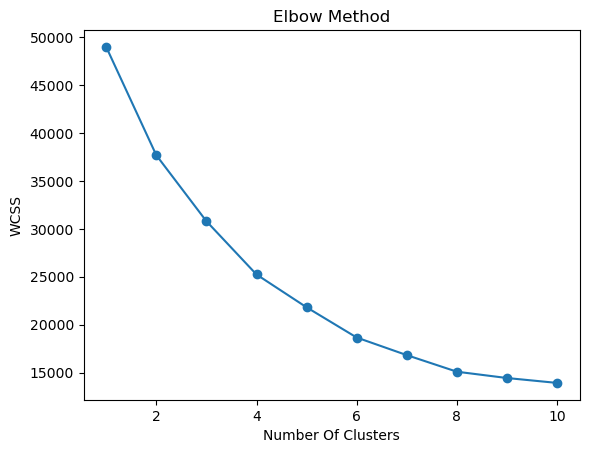

In [491]:
#Finding Optimal Number of Clusters (Elbow Method)
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss,marker="o")  
plt.title("Elbow Method")
plt.xlabel("Number Of Clusters")
plt.ylabel("WCSS")
plt.show()

In [492]:
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("kmeans", KMeans(n_clusters=5, random_state=42))
])

In [493]:
pipeline.fit(data)
preprocessor_fitted = pipeline.named_steps['preprocessor']
data['Cluster'] = pipeline['kmeans'].labels_
data

,Age,Gender,AnnualIncome,Spending_Score,Cluster
0,30,1,151479,89,2
1,58,0,185088,95,2
2,62,0,70912,76,3
3,23,1,55460,57,2
4,24,1,153752,76,2
...,...,...,...,...,...
15074,29,0,97723,30,4
15075,22,1,73361,74,2
15076,18,0,112337,48,2
15077,26,0,94312,5,4


In [494]:
kmeans = pipeline.named_steps['kmeans']

In [495]:
centroids_scaled = kmeans.cluster_centers_
scaler = preprocessor_fitted.transformers_[0][1] 
centroids_num = scaler.inverse_transform(centroids_scaled[:, :len(numerical_cols)])
centroids_df = pd.DataFrame(centroids_num, columns=numerical_cols)
centroids_df

,Age,AnnualIncome,Spending_Score
0,52.206331,60229.340856,25.580012
1,74.791667,154808.987710,48.813549
2,34.914702,120373.386787,77.481079
3,68.965288,65439.201994,74.750000
4,37.598583,153219.859942,25.230513


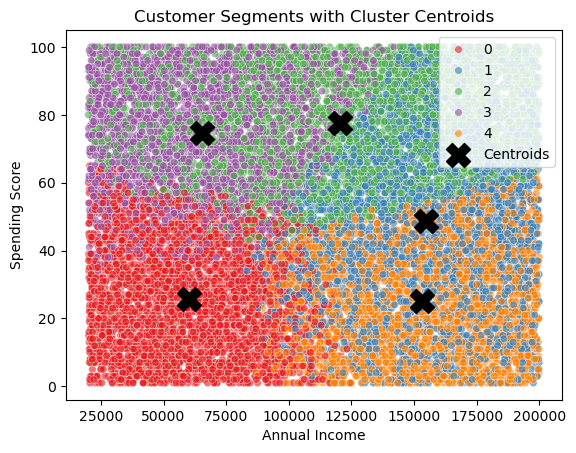

In [496]:
#Visualization
sns.scatterplot(
    x=data["AnnualIncome"],
    y=data["Spending_Score"],
    hue=data["Cluster"],
    palette="Set1",
    s=30,
    alpha=0.6
)
plt.scatter(
    centroids_df["AnnualIncome"], 
    centroids_df["Spending_Score"],  
    label="Centroids",
    s=300,
    c="black",
    marker="X"
)
plt.title("Customer Segments with Cluster Centroids")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()


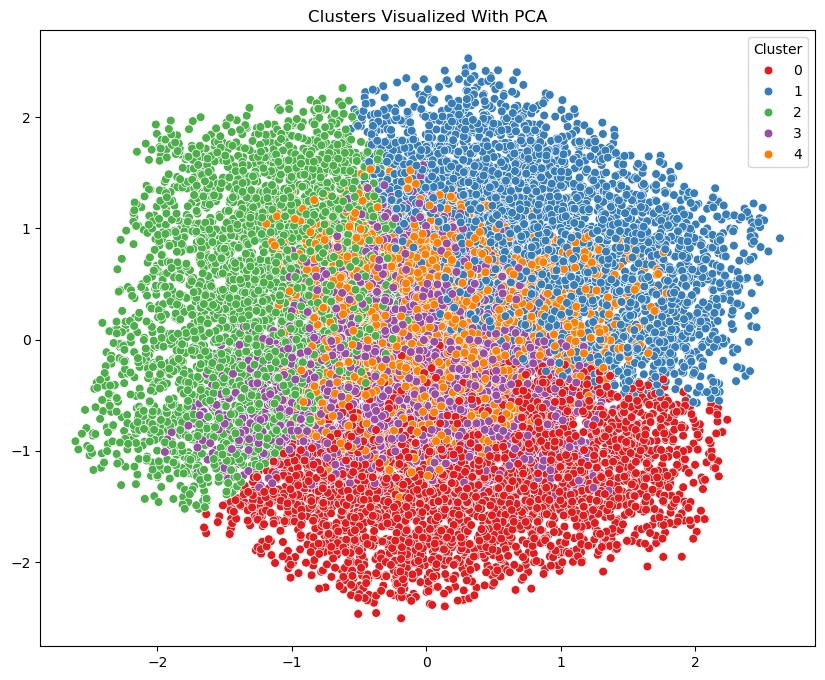

In [497]:
#PCA Visualization
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
X_pca=pca.fit_transform(X_scaled)

plt.figure(figsize=(10,8))
sns.scatterplot(x=X_pca[:,0],y=X_pca[:,1],hue=data["Cluster"],s=40,palette="Set1")
plt.title("Clusters Visualized With PCA")
plt.show()

# Using DBSCAN

In [499]:
# Create pipeline
dbscan_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('dbscan', DBSCAN(eps=1.5, min_samples=5))  
])

In [500]:
# Fit DBSCAN pipeline
X = data[numerical_cols + categorical_cols]  
X_scaled = preprocessor.fit_transform(X)  
dbscan = DBSCAN(eps=1, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

In [501]:
# Add cluster labels to data
data['DBSCAN_Cluster'] = clusters
print(data['DBSCAN_Cluster'].value_counts())

DBSCAN_Cluster
0    7595
1    7484
Name: count, dtype: int64


In [502]:
joblib.dump(dbscan_pipeline, "dbscan_customer_seg_pipeline.pkl")

['dbscan_customer_seg_pipeline.pkl']

In [503]:
def predict_customer_dbscan():
    
    pipeline = joblib.load("dbscan_customer_seg_pipeline.pkl")
    preprocessor = pipeline.named_steps['preprocessor']
    dbscan = pipeline.named_steps['dbscan']

    # Step 1: Take user input
    age = float(input("Enter Age: "))
    gender = input("Enter Gender (Male/Female): ").strip()
    if gender not in ['Male', 'Female']:
        print("Unknown gender entered, treating as 'Female'")
        gender = 'Female'
    income = float(input("Enter Annual Income: "))
    spend = float(input("Enter Spending Score (1-100): "))

    # Step 2: Creating DataFrame for new customer
    user_df = pd.DataFrame([[age, gender, income, spend]],
                           columns=['Age', 'Gender', 'AnnualIncome', 'Spending_Score'])

    # Step 3: Preprocessing user input
    user_scaled = preprocessor.transform(user_df)

    # Step 4: Assigning new point to nearest core point's cluster
    if hasattr(dbscan, 'components_') and len(dbscan.components_) > 0:
        core_samples = dbscan.components_  # core points in feature space
        core_labels = dbscan.labels_[dbscan.core_sample_indices_]
        nearest_core_idx, _ = pairwise_distances_argmin_min(user_scaled, core_samples)
        cluster = core_labels[nearest_core_idx[0]]
    else:
        cluster = -1  

    # Step 5: Output cluster info
    if cluster == -1:
        print("\nThis customer is considered noise (does not belong to a cluster).")
    else:
        print(f"\nThis customer belongs to Cluster {cluster}")

predict_customer_dbscan()

Enter Age:  19
Enter Gender (Male/Female):  Male
Enter Annual Income:  78045
Enter Spending Score (1-100):  2



This customer is considered noise (does not belong to a cluster).


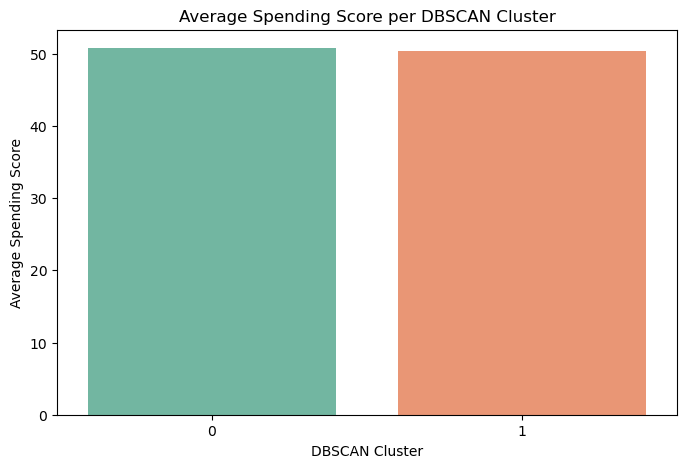

In [553]:
import matplotlib.pyplot as plt
import seaborn as sns

# Column containing DBSCAN cluster labels
cluster_col = 'DBSCAN_Cluster'

# Calculate average spending per cluster
avg_spending_dbscan = data.groupby(cluster_col)['Spending_Score'].mean().reset_index()
avg_spending_dbscan.rename(columns={'Spending_Score': 'Avg_Spending'}, inplace=True)

# Visualization
plt.figure(figsize=(8,5))
sns.barplot(x=cluster_col, y='Avg_Spending', data=avg_spending_dbscan, palette='Set2')
plt.title('Average Spending Score per DBSCAN Cluster')
plt.xlabel('DBSCAN Cluster')
plt.ylabel('Average Spending Score')
plt.show()


### After evaluating DBSCAN for customer segmentation, it was observed that DBSCAN produced only 2 clusters and treated many points as noise, making it less effective for this dataset. KMeans provides clearer, well-separated clusters and more actionable insights, so the pipeline has been updated to use KMeans instead.

In [556]:
joblib.dump(pipeline, "customer_seg_pipeline.pkl")
print("Pipeline saved successfully!")


Pipeline saved successfully!


In [558]:
def predict_customer_segment():
    # Load saved pipeline
    pipeline = joblib.load("customer_seg_pipeline.pkl")
    
    # Step 1: Take inputs
    age = float(input("Enter Age: "))
    gender = input("Enter Gender (Male/Female): ").strip().capitalize()
    if gender not in ['Male', 'Female']:
        print("Warning: Unknown gender entered, treating as 'Female' by default")
        gender = 'Female'
    income = float(input("Enter Annual Income: "))
    spend = float(input("Enter Spending Score (1-100): "))
    
    # Step 2: DataFrame
    user_df = pd.DataFrame([[age, gender, income, spend]],
                           columns=['Age','Gender','AnnualIncome','Spending_Score'])
    
    # Step 3: Predict cluster
    cluster = pipeline.predict(user_df)[0]
    print(f"\nThis customer belongs to Cluster {cluster}")
    
    # Step 4: Geting cluster centroid (numerical columns)
    preprocessor = pipeline.named_steps['preprocessor']
    kmeans = pipeline.named_steps['kmeans']
    scaler = preprocessor.named_transformers_['num']
    
    centroids_scaled = kmeans.cluster_centers_[:, :len(scaler.mean_)]  # only numerical part
    centroids_num = scaler.inverse_transform(centroids_scaled)
    c_age, c_income, c_spend = centroids_num[cluster]
    
    # Step 5: Business insight
    
    print("\n=== Business Insights ===")
    print(f"- Avg Age of this cluster: {c_age:.1f} years")
    print(f"- Avg Income: ${c_income:,.0f}")
    print(f"- Avg Spending Score: {c_spend:.1f}")
    
    if c_spend > 60 and c_income > 60000:
        print(" High income, high spending: VIP customers. Offer loyalty programs & exclusive deals.")
    elif c_spend > 60 and c_income <= 60000:
        print(" Medium/low income but high spending: Aspirational buyers. Target with affordable luxury.")
    elif c_spend < 40 and c_income > 60000:
        print(" High income but low spending: Cost-conscious or disengaged. Re-engage with personalized offers.")
    elif c_spend < 40 and c_income <= 60000:
        print(" Low income, low spending: Budget customers. Focus on discounts & promotions.")
    else:
        print("Moderate income and spending: Stable middle segment. Maintain with regular promotions.")


In [560]:
predict_customer_segment()

Enter Age:  19
Enter Gender (Male/Female):  male
Enter Annual Income:  78045
Enter Spending Score (1-100):  2



This customer belongs to Cluster 0

=== Business Insights ===
- Avg Age of this cluster: 52.2 years
- Avg Income: $60,229
- Avg Spending Score: 25.6
 High income but low spending: Cost-conscious or disengaged. Re-engage with personalized offers.
